<a href="https://colab.research.google.com/github/sf-rahul/Tensorflow/blob/master/FashionMnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

TensorFlow 2.x selected.


In [3]:
from __future__ import absolute_import,unicode_literals,division,print_function
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
print(tf.__version__)

2.1.0


In [4]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images,train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [5]:
print(train_images.shape)
print(train_labels.shape)

(60000, 28, 28)
(60000,)


In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

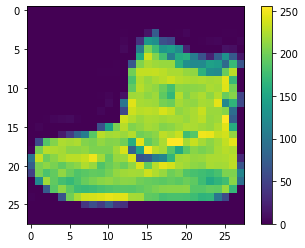

In [7]:
#preprocess the data.
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()


In [0]:
#Normalizing pixels to be between  [0,1]
train_images = train_images/255.0
test_images = test_images/255.0



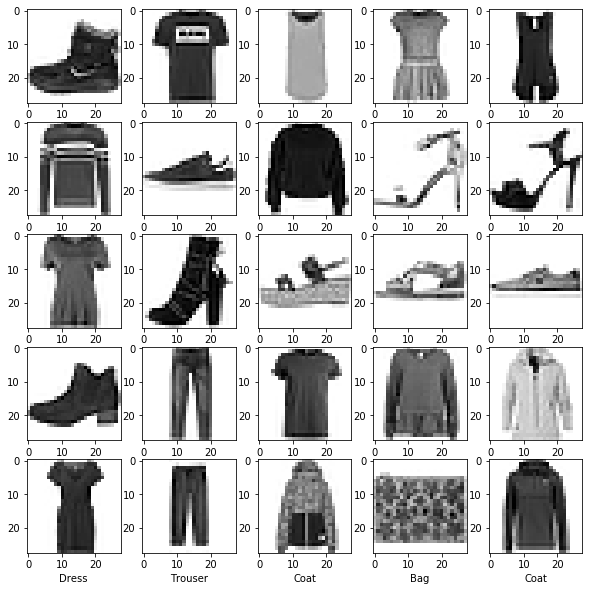

In [9]:
#displying first 25 images 
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks=([])
  plt.yticks=([])
  plt.grid(False)
  plt.imshow(train_images[i],cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])
plt.show()

In [0]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128,activation='relu'),
    keras.layers.Dense(10)
])

In [0]:
model.compile(optimizer='adam',
              loss =tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [14]:
model.fit(train_images,train_labels,epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 5s 79us/sample - loss: 0.4968 - accuracy: 0.8259
Epoch 2/10
60000/60000 [==============================] - 4s 69us/sample - loss: 0.3745 - accuracy: 0.8656
Epoch 3/10
60000/60000 [==============================] - 4s 69us/sample - loss: 0.3339 - accuracy: 0.8791
Epoch 4/10
60000/60000 [==============================] - 4s 69us/sample - loss: 0.3113 - accuracy: 0.8864
Epoch 5/10
60000/60000 [==============================] - 4s 68us/sample - loss: 0.2938 - accuracy: 0.8922
Epoch 6/10
60000/60000 [==============================] - 4s 69us/sample - loss: 0.2790 - accuracy: 0.8965
Epoch 7/10
60000/60000 [==============================] - 4s 69us/sample - loss: 0.2686 - accuracy: 0.9003
Epoch 8/10
60000/60000 [==============================] - 4s 69us/sample - loss: 0.2560 - accuracy: 0.9058
Epoch 9/10
60000/60000 [==============================] - 4s 70us/sample - loss: 0.2473 - accuracy: 0.9078
Epoch 10/10
60

In [15]:
test_loss , test_acc = model.evaluate(test_images,test_labels,verbose=2)
print('\n test accuracy', test_acc)

10000/10000 - 0s - loss: 0.3295 - accuracy: 0.8849

 test accuracy 0.8849


In [0]:
probability_model = tf.keras.Sequential([model,tf.keras.layers.Softmax()])


In [0]:
predictions = probability_model.predict(test_images)

In [19]:
predictions[0]

array([2.2403331e-08, 2.0715071e-08, 6.1596062e-09, 3.2753736e-10,
       2.3527264e-08, 1.0281620e-03, 1.3009809e-07, 1.1005146e-02,
       1.0086288e-08, 9.8796648e-01], dtype=float32)

In [20]:
np.argmax(predictions[0])

9

In [21]:
test_labels[0]

9